c:\Users\natib\OneDrive\Documents\Abschlussprojekt-cnn-digit-recognition\venv_py310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)              │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_42 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,186 (1.66 MB)

 Trainable params: 434,186 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6497 - loss: 1.0106 - val_accuracy: 0.9846 - val_loss: 0.0644
Epoch 2/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9651 - loss: 0.1314 - val_accuracy: 0.9882 - val_loss: 0.0453
Epoch 3/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9791 - loss: 0.0807 - val_accuracy: 0.9818 - val_loss: 0.0729
Epoch 4/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9834 - loss: 0.0661 - val_accuracy: 0.9879 - val_loss: 0.0584
Epoch 5/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9853 - loss: 0.0595 - val_accuracy: 0.9909 - val_loss: 0.0465
Epoch 6/6
788/788 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9890 - loss: 0.0425 - val_accuracy: 0.9882 - val_loss: 0.0492
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9873 - loss: 0.0544
Test accuracy: 0.9889


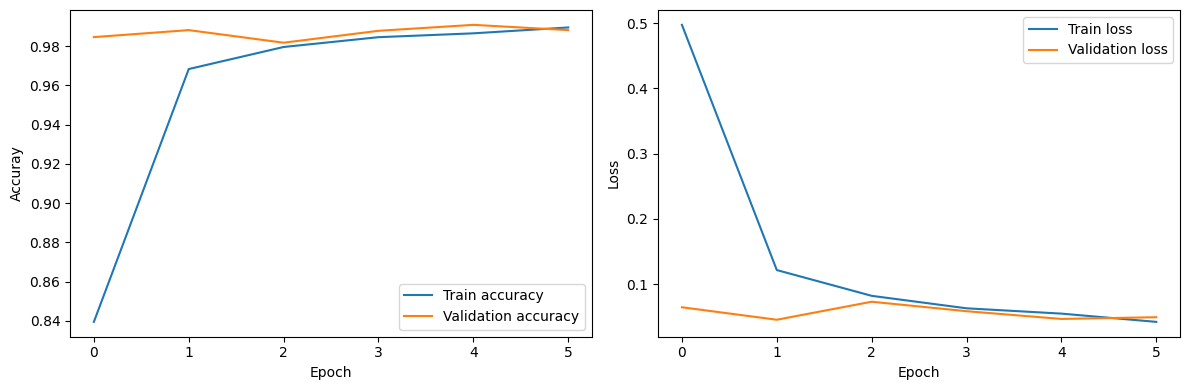

In [26]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from functools import partial

# 1. Preaper datas
# Load MNIST 
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

# Split train and test datas (80% train data, 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation 0-1 number (better to the meory usage)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape for the CNN -1 auto batch size, 28x28 pixel, 1 cahannel greyscale image if colored 3(RGB)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)



y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Validate data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# 2. Modell 

#default conv2D
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", 
                        activation="relu", kernel_initializer="he_normal") #kernel size 3x3, with padding, relu

model = tf.keras.Sequential([
    
    # 2D convolutional layers
    
    #1.
    DefaultConv2D(filters=32,kernel_size=5,input_shape=[28,28,1]), # input 2D convolutional layer number of maps 32 and start with 5x5 kernel
    tf.keras.layers.MaxPool2D(),                                   #2D maxpooling layer
    #2.
    DefaultConv2D(filters=64),                                     #2D convolutional layer number of maps 64
    DefaultConv2D(filters=64),                                     #2D convolutional layer number of maps 64
    tf.keras.layers.MaxPool2D(),                                   #2D maxpooling layer
    #3.
    DefaultConv2D(filters=128),                                    #2D convolutional layer number of maps 128
    DefaultConv2D(filters=128),                                    #2D convolutional layer number of maps 128
    tf.keras.layers.MaxPool2D(),                                   #2D maxpooling layer
    
    #fully connected layers
    tf.keras.layers.Flatten(),                                     # make a 1D vector to fully connected layers
    # 1.
    tf.keras.layers.Dense(units=128, activation="relu", 
                          kernel_initializer="he_normal"),         # relu 1 (positiv) or 0 (negativ) fully connected layer (hidden layer) 128 neuron
    tf.keras.layers.Dropout(0.4),                                  # dropout layers 50% (reduce overfitting, random shutdown neurons)
    # 2.
    tf.keras.layers.Dense(units=64, activation="relu",             
                          kernel_initializer="he_normal"),         # relu fully connected layer (hidden layer) 64 neuron
    tf.keras.layers.Dropout(0.4),                                  # dropout layers 50% (reduce overfitting)
    # 3. lastlayer
    tf.keras.layers.Dense(units=10,activation="softmax")           # output neurons 10(numbers 0-9) with softmax (maximum number)
])

# Salt-and-Pepper noise
def add_salt_and_pepper_noise(images, prob=0.05):
    noisy_images = images.copy()
    for i in range(images.shape[0]):
        mask = np.random.choice([0, 1, 2], size=images[i].shape, p=[prob / 2, prob / 2, 1 - prob])
        noisy_images[i][mask == 0] = 0.0  # Slat black pixel
        noisy_images[i][mask == 1] = 1.0  # Pepper - white pixel
    return noisy_images

# generate noisy dates 
noisy_X_train = add_salt_and_pepper_noise(X_train)
noisy_X_val = add_salt_and_pepper_noise(X_val)

# 3. Training and evaluation 
# Modell compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'] #correct classification rate
)

# Show the modell structure
model.summary()

# Modell training 
history = model.fit(
    noisy_X_train, y_train,
    # X_train, y_train, #train data (x) and label (y)
    epochs=6,        #6 treaning cycles. How many times to go through all the teaching data
    batch_size=64,    #how many images are processed at a time
    validation_data=(X_val, y_val), #after each epoch, the model is also evaluated against the validation data
    verbose=1         # Shows the progress of teaching (1 = detailed display)
)

# Shows the accuracy of the model on data that has not yet been seen
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Grafikons
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuray')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Save the modell

In [27]:
# save weights
model.save_weights('number_recognition_noisy.weights.h5')

# modell.save
model.save('number_recognition_model_noisy.keras')